# General Assembly DSI - Denver 2018
## Capstone Project - DFS Model
This is my capstone project at General Assembly's fifth [Data Science Immersive](https://generalassemb.ly/education/data-science-immersive) cohort in 2018. I am developing a model to assist in optimizing NFL lineups on the daily fantasy sports platforms [Draft Kings](https://www.draftkings.com/) and [Fan Duel](https://www.fanduel.com/).

### Problem Statement

Can we build a model to predict a football player’s fantasy football performance to estimate their value and implement the model in conjunction with a daily fantasy strategy to be profitable?

### Exploratory Data Analysis (EDA)
There was a lot of EDA performed in the data gathering & cleaning portion of this project. This EDA will seek to further explore the relationships between features, and perform a final preprocessing of the data to prepare for modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/runningbacks_final.csv')

In [3]:
df.head()

,Name,Age,Week,Year,Team,Oppt,h/a,Favored,Spread,O/U,...,Receptions,Targets,Rec_Yds,Rec_TDs,Opp_Avg_Carries,Opp_Rank,Opp_Avg_TDs_Allowed,Opp_Avg_Yds_Allowed,FD salary,FD points
0,"Jones, Taiwan",23.054,2,2011,OAK,BUF,a,BUF,-4.0,41.0,...,0.000000,0.000000,0.000000,0.0,12.0,4,0.0,25.0,4500.0,0.4
1,"Charles, Jamaal",24.265,2,2011,KC,DET,a,DET,-9.0,45.0,...,5.000000,6.000000,9.000000,1.0,33.0,3,1.0,154.0,8700.0,2.7
2,"Peterson, Adrian",26.181,2,2011,MIN,TB,h,MIN,-1.0,41.0,...,0.666667,1.333333,4.666667,0.0,24.0,11,1.0,80.0,9100.0,27.1
3,"Blount, LeGarrette",24.287,2,2011,TB,MIN,a,MIN,-1.0,41.0,...,0.333333,0.666667,2.000000,0.0,32.0,2,0.0,101.0,6300.0,19.1
4,"McCoy, LeSean",23.068,2,2011,PHI,ATL,a,PHI,-2.5,49.5,...,2.000000,3.333333,12.666667,0.0,24.0,5,1.0,157.0,8900.0,25.6


In [4]:
df.shape

(3703, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 27 columns):
Name                   3703 non-null object
Age                    3703 non-null float64
Week                   3703 non-null int64
Year                   3703 non-null int64
Team                   3703 non-null object
Oppt                   3703 non-null object
h/a                    3703 non-null object
Favored                3703 non-null object
Spread                 3703 non-null float64
O/U                    3703 non-null float64
Weather                3703 non-null object
Temperature            3703 non-null float64
Wind                   3703 non-null float64
Month                  3703 non-null object
Carries                3703 non-null float64
Rush_Yds               3703 non-null float64
Rush_TDs               3703 non-null float64
Receptions             3703 non-null float64
Targets                3703 non-null float64
Rec_Yds                3703 non-null float64
Rec_

### Column Transformations
- Rearrange `Month` to the front of the pack
- One-hot-encode `h/a` and `Favored`
- Dummy weather

In [6]:
# dummy weather
df = pd.get_dummies(df, columns = ['Weather'])

In [7]:
# rearrange columns
df_cols = ['Name', 'Age', 'Year', 'Week', 'Month', 'Team', 'Oppt', 'h/a',
           'Favored', 'Spread', 'O/U', 'Temperature', 'Wind', 'Carries',
           'Rush_Yds', 'Rush_TDs', 'Receptions', 'Targets', 'Rec_Yds', 'Rec_TDs',
           'Opp_Avg_Carries', 'Opp_Rank', 'Opp_Avg_TDs_Allowed',
           'Opp_Avg_Yds_Allowed', 'Weather_DOME',
           'Weather_Fog', 'Weather_Rain', 'Weather_Rain | Fog', 'Weather_Snow',
           'Weather_Snow | Fog', 'Weather_Snow | Freezing Rain', 'Weather_Sunny', 'FD salary', 'FD points',]

df = df[df_cols]

In [8]:
# one-hot 'h/a'
df['h/a'] = df['h/a'].map({'h': 1, 'a': 0})

In [9]:
# one-hot 'Favored'
for index, player in df.iterrows():
    if player['Favored'] == player['Team']:
        df.loc[index, 'Favored'] = 1
    else:
        df.loc[index, 'Favored'] = 0

In [30]:
df = df.groupby(['Name', 'Year', 'Week', 'Month', 'Team', 'Oppt']).sum()

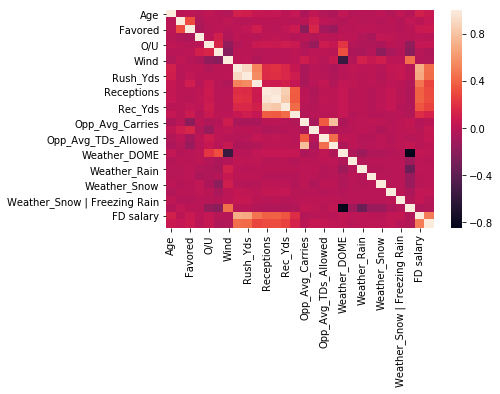

In [31]:
# multicollinearity?
sns.heatmap(df.corr());

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


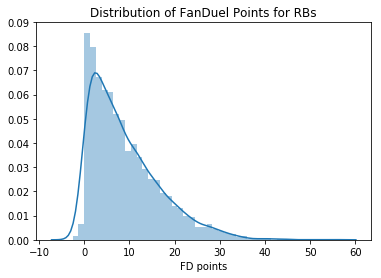

In [44]:
sns.distplot(df['FD points']).set_title('Distribution of FanDuel Points for RBs');

In [55]:
df[['FD points']].describe()[1:]

,FD points
mean,8.979109
std,7.696168
min,-2.600000
25%,2.900000
50%,7.000000
75%,13.100000
max,55.500000


> Runningbacks are right-skewed. This tells me it's more important to find a good runningback than it is a good quarterback who is normally skewed.

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


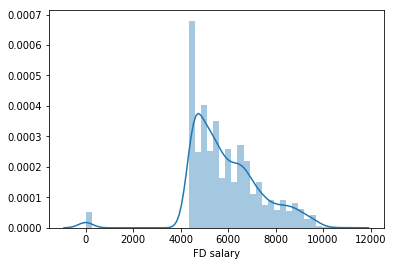

In [34]:
sns.distplot(df['FD salary']);

In [54]:
df[['FD salary']].describe()[1:]

,FD salary
mean,5915.230894
std,1501.776454
min,0.000000
25%,4800.000000
50%,5600.000000
75%,6800.000000
max,11000.000000


> Again right-skewed. If there is a relationship between salary and points then it would likely be important to draft runningbacks with higher salaries. However, if there is NOT a relationship then I believe it's important to find the "diamond in the rough" kind of player.

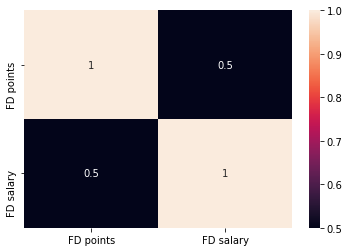

In [36]:
sns.heatmap(df[['FD points', 'FD salary']].corr(), annot = True);

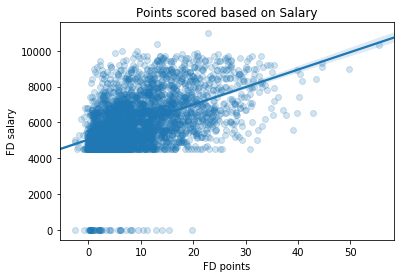

In [37]:
sns.regplot(df['FD points'], df['FD salary'], scatter_kws = {'alpha': 0.2}).set_title('Points scored based on Salary');

### Summarize Relationships to Target
I will group columns by their "category"
- Betting / Lines
- Player Stats
- Opponent / Defense Stats
- Weather

#### Betting & Lines

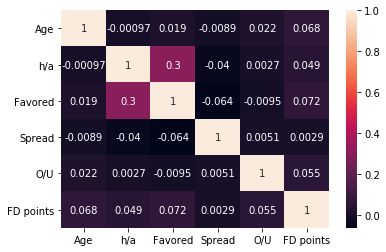

In [38]:
# betting info versus FD points
betting_cols = ['Age', 'h/a', 'Favored', 'Spread', 'O/U', 'FD points']
sns.heatmap(df[betting_cols].corr(), annot = True);

#### Points scored compared to player stats
It is important to remember when analyzing these that the statistics represent a player's 3-game average leading up to the contest in which they scored the target variable.

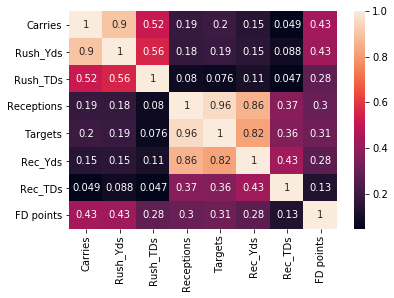

In [39]:
# player stats relationship with FD points
player_stat_columns = ['Carries', 'Rush_Yds', 'Rush_TDs', 'Receptions', 'Targets', 'Rec_Yds', 'Rec_TDs', 'FD points']
sns.heatmap(df[player_stat_columns].corr(), annot = True);

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


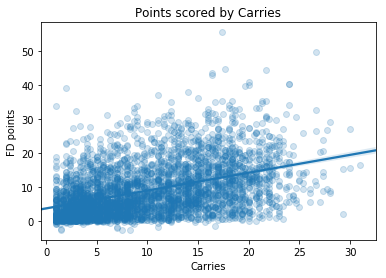

In [45]:
sns.regplot(df['Carries'], df['FD points'], scatter_kws = {'alpha': 0.2}).set_title('Points scored by Carries');

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


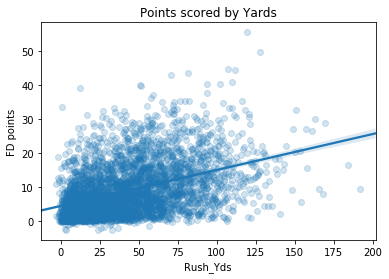

In [46]:
sns.regplot(df['Rush_Yds'], df['FD points'], scatter_kws = {'alpha': 0.2}).set_title('Points scored by Yards');

In [49]:
df[df['FD points'] > 50]

,,,,,,Age,h/a,Favored,Spread,O/U,Temperature,Wind,Carries,Rush_Yds,Rush_TDs,...,Weather_DOME,Weather_Fog,Weather_Rain,Weather_Rain | Fog,Weather_Snow,Weather_Snow | Fog,Weather_Snow | Freezing Rain,Weather_Sunny,FD salary,FD points
Name,Year,Week,Month,Team,Oppt,,,,,,,,,,,,,,,,,,,,,
"Charles, Jamaal",2013,15,December,KC,OAK,26.353,0,1,-6.0,44.5,64.0,6.0,17.333333,119.333333,1.333333,...,0,0,0,0,0,0,0,1,10300.0,55.5


In [48]:
df[df['Rush_Yds'] > 175][player_stat_columns]

,,,,,,Carries,Rush_Yds,Rush_TDs,Receptions,Targets,Rec_Yds,Rec_TDs,FD points
Name,Year,Week,Month,Team,Oppt,,,,,,,,
"McCoy, LeSean",2013,10,November,PHI,GB,31.000000,184.0,1.000000,1.0,1.000000,5.000000,0.0,16.6
"Peterson, Adrian",2012,16,December,MIN,HOU,25.333333,192.0,1.333333,1.0,1.333333,8.666667,0.0,9.5


#### Points scored based on weather conditions

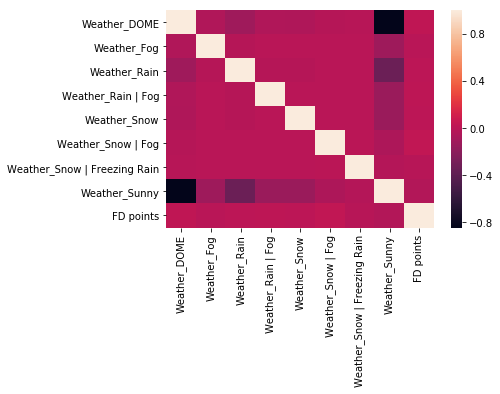

In [40]:
# weather columns
weather_columns = ['Weather_DOME', 'Weather_Fog', 'Weather_Rain', 'Weather_Rain | Fog', 'Weather_Snow',
                   'Weather_Snow | Fog', 'Weather_Snow | Freezing Rain', 'Weather_Sunny', 'FD points']
sns.heatmap(df[weather_columns].corr());

#### Points scored based on defensive stats against opponent
It is important to remember that these stats are rolling averages for the three games leading up to an opponent.

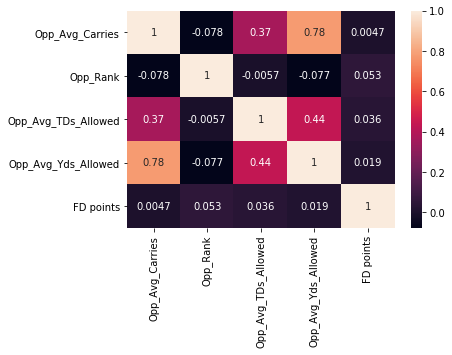

In [41]:
# defensive stats
def_stat_columns = ['Opp_Avg_Carries', 'Opp_Rank', 'Opp_Avg_TDs_Allowed', 'Opp_Avg_Yds_Allowed', 'FD points']
sns.heatmap(df[def_stat_columns].corr(), annot = True);

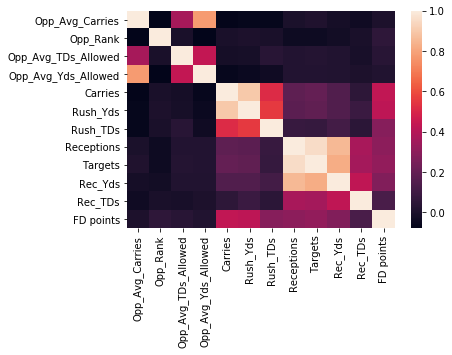

In [43]:
# how do player stats compare to defensive stats?
stats = def_stat_columns + player_stat_columns

# removing second FD points column
stats = stats[:4] + stats[5:]
sns.heatmap(df[stats].corr(), annot = False);

> This makes sense since the stats are not for the actual matchup. If I included the stats a player had against that specific opponent I'm sure we would see some correlation.

In [51]:
df

Age  h/a  Favored  Spread  \
Name            Year Week Month     Team Oppt                                 
Abdullah, Ameer 2015 2    September DET  MIN   22.099    0        0    -2.5   
                     3    September DET  DEN   22.106    1        0    -3.0   
                     4    October   DET  SEA   22.114    0        0   -10.0   
                     5    October   DET  ARI   22.120    1        0    -4.5   
                     6    October   DET  CHI   22.127    1        1    -3.5   
                     7    October   DET  MIN   22.134    1        1    -1.0   
                     8    November  DET  KC    22.141    0        1    -3.0   
                     10   November  DET  GB    22.155    0        0   -10.5   
                     11   November  DET  OAK   22.162    1        0    -1.5   
                     12   November  DET  PHI   22.166    1        1    -3.0   
                     13   December  DET  GB    22.173    1        0    -2.5   
                     14   December  DET  LAR   22.183    0        1    -3.0   
                     15   December  DET  NO    22.191    0        0    -2.5   
                     16   December  DET  SF    22.197    1        1    -9.0   
                2016 2    September DET  TEN   23.097    1        1    -6.0   
                2017 2    September DET  NYG   24.097    0        0    -3.5   
                     3    September DET  ATL   24.103    1        0    -3.0   
                     4    October   DET  MIN   24.110    0        0    -2.0   
                     5    October   DET  CAR   24.117    1        1    -2.5   
                     6    October   DET  NO    24.124    0        0    -4.0   
                     8    October   DET  PIT   24.138    1        0    -3.0   
                     9    November  DET  GB    24.146    0        1    -2.5   
                     10   November  DET  CLE   24.152    1        1   -10.5   
                     11   November  DET  CHI   24.159    0        1    -3.0   
                     12   November  DET  MIN   24.163    1        0    -3.0   
                     15   December  DET  CHI   24.186    1        1    -5.0   
                     16   December  DET  CIN   24.194    0        1    -3.5   
                     17   December  DET  GB    24.201    1        1    -7.5   
Ajayi, Jay      2015 9    November  MIA  BUF   22.146    0        0    -4.0   
                     11   November  MIA  DAL   22.160    1        0    -2.0   
...                                               ...  ...      ...     ...   
Yeldon, T.J.    2016 13   December  JAX  DEN   23.063    1        0    -3.5   
                     14   December  JAX  MIN   23.070    1        0    -3.5   
                     15   December  JAX  HOU   23.077    0        0    -3.5   
                     16   December  JAX  TEN   23.083    1        0    -4.0   
                2017 7    October   JAX  IND   24.020    0        1    -3.0   
                     9    November  JAX  CIN   24.034    1        1    -6.0   
                     11   November  JAX  CLE   24.048    0        1    -7.5   
                     12   November  JAX  ARI   24.055    0        1    -5.0   
                     14   December  JAX  SEA   24.069    1        1    -3.0   
                     15   December  JAX  HOU   24.076    1        1   -10.5   
                     16   December  JAX  SF    24.083    0        1    -4.0   
                     17   December  JAX  TEN   24.090    0        0    -2.5   
Zenner, Zach    2015 4    October   DET  SEA   24.022    0        0   -10.0   
                     5    October   DET  ARI   24.028    1        0    -4.5   
                     6    October   DET  CHI   24.035    1        1    -3.5   
                2016 4    October   DET  CHI   25.019    0        1    -3.0   
                     5    October   DET  PHI   25.026    1        0    -3.5   
                     6    October   DET  LAR   25.033    1        1    -2.5   
                     

In [52]:
df.to_csv('../data/modeling_rbs.csv', index = True) # remember to include index